In [2]:
from google.colab import files
files.upload()

Saving laptop.csv to laptop.csv


{'laptop.csv': b',Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price\n0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832\n1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232\n2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0\n3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.336\n4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.808\n5,5.0,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0\n6,6.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GH

In [67]:
import pandas as pd
df = pd.read_csv('/content/laptop.csv')

In [17]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [84]:
df.dtypes

,0
Company,object
TypeName,object
Inches,float64
ScreenResolution,object
Cpu,object
Ram,float64
Memory,float64
Gpu,object
OpSys,object
Weight,float64


In [68]:
df = df.drop(columns= 'Unnamed: 0')

In [69]:
df = df.rename(columns={'Unnamed: 0.1':'Index'})

In [70]:
df = df.drop(columns= 'Index')

In [83]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [82]:
df = df.dropna()

In [71]:
df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')

In [72]:
df['Ram'] = df['Ram'].str.replace("GB","")

In [73]:
df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce')

In [43]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [76]:
def convert_memory(mem_str):
    mem_str = str(mem_str)
    mem_str = mem_str.replace('GB', '').replace('TB', '*1024')
    mem_str = mem_str.replace('Flash Storage', '').replace('HDD', '').replace('SSD', '').replace('Hybrid', '')
    parts = mem_str.split('+')
    total = 0
    for part in parts:
        try:
            total += eval(part.strip())
        except:
            pass
    return total

df['Memory'] = df['Memory'].apply(convert_memory)


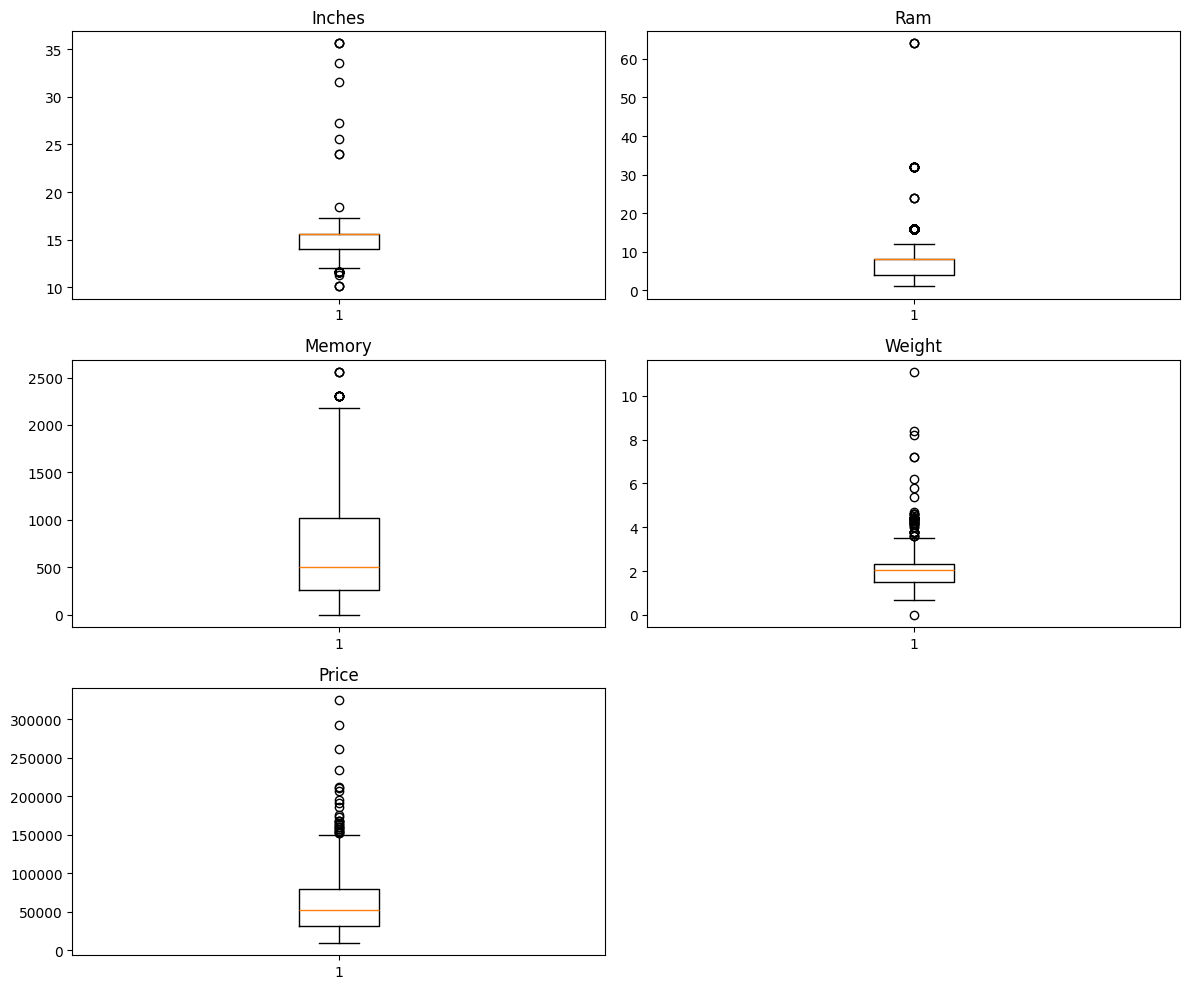

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

index = 1
for col in numerical:
    plt.subplot(3, 2, index)
    plt.boxplot(df[col])
    plt.title(col)
    index += 1  # increment index for the next subplot

plt.tight_layout()
plt.show()

In [86]:
numerical = []
categorical = []
for i in df.columns:
  if df[i].dtype == 'object':
    categorical.append(i)
  else:
    numerical.append(i)

In [78]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [79]:
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

In [80]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


In [97]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

le = LabelEncoder()
for i in categorical:
  df[i] = le.fit_transform(df[i])
ss = RobustScaler()
df[numerical] = ss.fit_transform(df[numerical])

In [98]:
x = df.iloc[:,:-1]

In [99]:
y = df.iloc[:,-1]

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [103]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print(f"{name} - MSE: {mse}, MAE: {mae}, R2: {r2}")

Linear Regression - MSE: 0.2688638786327541, MAE: 0.3372385228796607, R2: 0.5830892995716844
Ridge Regression - MSE: 0.26874357277102967, MAE: 0.3372351556325528, R2: 0.5832758504811344
Lasso Regression - MSE: 0.42680759001913443, MAE: 0.48322447602869717, R2: 0.3381756887244384
Decision Tree Regression - MSE: 0.25568161205268386, MAE: 0.2599659673067318, R2: 0.6035302305776553
Random Forest Regression - MSE: 0.09592798251853621, MAE: 0.18192928642416678, R2: 0.8512503703143186
Gradient Boosting Regression - MSE: 0.0905230448564048, MAE: 0.19346124154947164, R2: 0.8596314751244911
Support Vector Regression - MSE: 0.27877542395081717, MAE: 0.3277222786813173, R2: 0.5677200751080109
K-Nearest Neighbors Regression - MSE: 0.2118137308834547, MAE: 0.2932884475903582, R2: 0.6715534591257739


In [111]:
from sklearn.model_selection import GridSearchCV
gbr = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(x_train, y_train)
print("Best Score:", grid_search.best_score_)
best_gbr = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Score: 0.8121736294918559
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [112]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(best_gbr, x_train, y_train, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Average R² Score:", round(np.mean(cv_scores), 4))
print("Standard Deviation:", round(np.std(cv_scores), 4))

Cross-Validation R² Scores: [0.83843292 0.82245372 0.84038302 0.77299807 0.78660042]
Average R² Score: 0.8122
Standard Deviation: 0.0275


In [117]:
best_gbr.fit(x_train,y_train)
y_pred = best_gbr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MSE: {mse}, MAE: {mae}, R2: {r2}")

MSE: 0.07926534135627136, MAE: 0.17049937466563056, R2: 0.8770881043873078


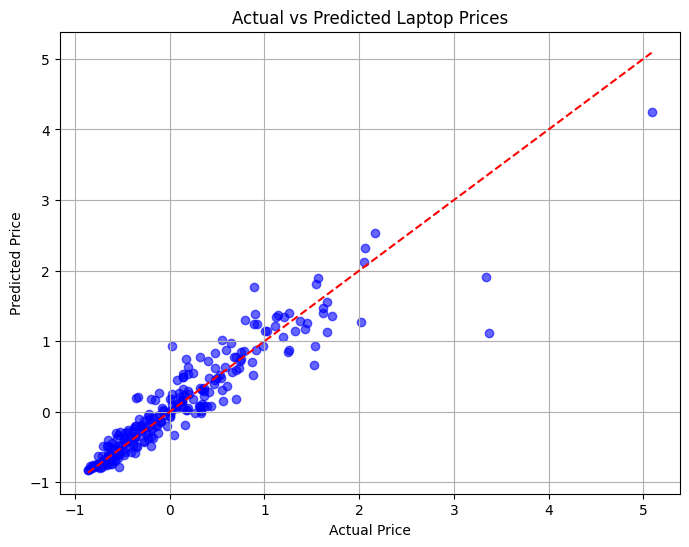

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.grid(True)
plt.show()


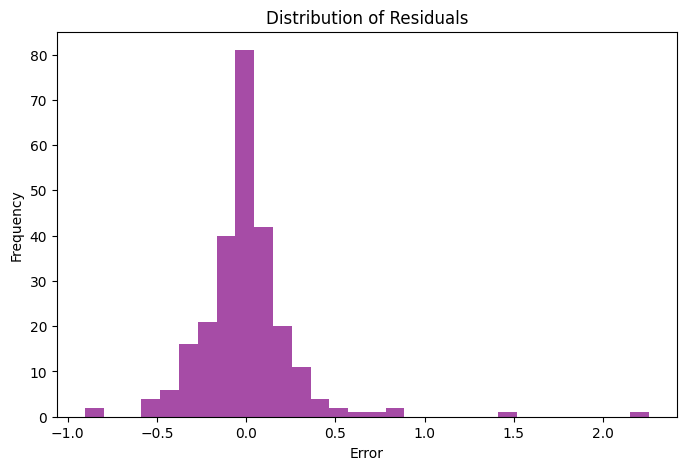

In [120]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


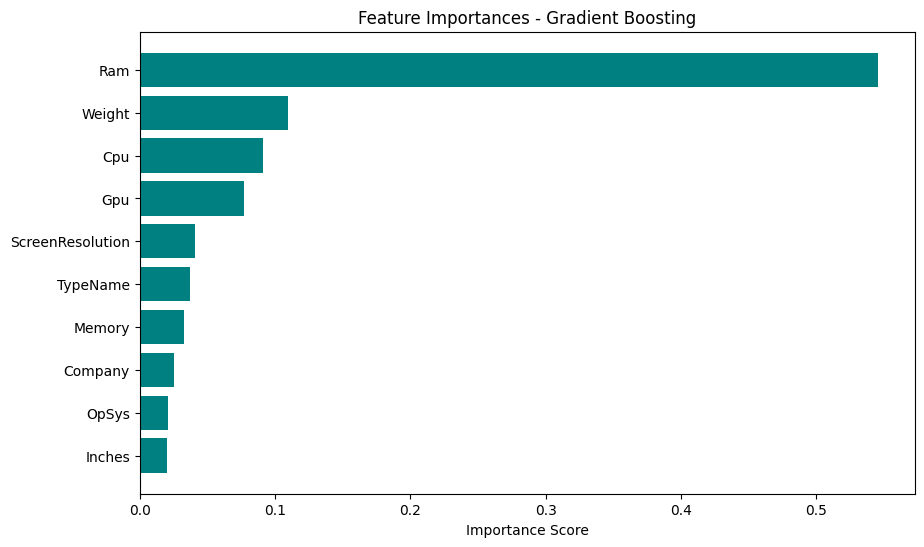

In [121]:
import pandas as pd

importances = best_gbr.feature_importances_
features = x_train.columns

feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='teal')
plt.xlabel("Importance Score")
plt.title("Feature Importances - Gradient Boosting")
plt.gca().invert_yaxis()
plt.show()


In [124]:
import pickle

# Save model
with open('laptop_price_model.pkl', 'wb') as f:
    pickle.dump(best_gbr, f)


In [127]:
import streamlit as st
import pickle
import numpy as np

# Load the model
model = pickle.load(open('laptop_price_model.pkl', 'rb'))

# Title
st.title("Laptop Price Predictor 💻")

# Input fields
company = st.selectbox('Brand', ['Apple', 'HP', 'Dell', 'Lenovo', 'Asus', 'Acer'])  # example
ram = st.selectbox('RAM (in GB)', [4, 8, 16, 32])
cpu = st.selectbox('Processor Type', ['Intel Core i5', 'Intel Core i7', 'AMD Ryzen 5'])  # etc
storage = st.selectbox('Storage (in GB)', [128, 256, 512, 1024])
weight = st.number_input('Weight (kg)', 1.0, 3.0)
screen_size = st.number_input('Screen Size (inches)', 11.0, 17.0)

# Prediction button
if st.button("Predict Price"):
    # Here you must preprocess input just like training data
    input_data = np.array([[screen_size, ram, storage, weight]])  # Example
    prediction = model.predict(input_data)
    st.success(f"Estimated Price: ₹{int(prediction[0])}")


2025-07-26 17:10:14.106 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 17:10:14.621 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-26 17:10:14.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 17:10:14.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 17:10:14.633 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 17:10:14.636 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 17:10:14.641 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 17:10:14.644 Thread 'MainThread': mi

In [128]:
from google.colab import files
files.download('laptop_price_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
import streamlit
import sklearn
import numpy
import pandas as pd

print("Streamlit ==", streamlit.__version__)
print("Scikit-learn ==", sklearn.__version__)
print("NumPy ==", numpy.__version__)
print("Pandas ==", pd.__version__)


Streamlit == 1.47.1
Scikit-learn == 1.6.1
NumPy == 2.0.2
Pandas == 2.2.2
